# **Homework 5**

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import statistics
import math
from scipy import stats
import h5py
import pandas as pd

plt.rcParams["figure.figsize"] = (10,10)

The purpose of HW5 is to work carefully through a numeric or simulated solution of Bayes' Theorem which takes the form:

$P(signal|data) = \frac{P(data|signal)P(signal)}{P(data}$

Our goal is to find $P(signal|data)$. From Bayes' Theorem, it says given a data reading, the probability it was produced by a given true signal $((P(signal|data))$, is equal to the probability of getting a particular data reading given a certain true signal $(P(data|signal))$ times the probability of the signal having a particular strength $(P(signal))$, divided by the probability of each data reading $(P(data))$. 

We should explicitly describe what each of these things mean in Bayes' Theorem. So we have: 1. $P(signal|data)$ is what we want to know; 2. $P(data|signal)$ is usually easy to determine. If we have a signal-free background we can inject fake signals of known strength and then simulate the observations in the presence of known (fake) signals which means we can easily generate $P(data|signal)$; 3. $P(signal)$ is called a prior. It is the probability the signal has a particular strength; and 4. $P(data)$ is almost always just a normalization factor and is often dropped. This means the result will have to be renormalized usually by making sure the full $P(signal|data)$ integrates to one.

### **Problem 1**

In this problem, we will create a signal-free background. Here, we will use a normal distribution with a modest $\sigma$ in the range 2-5 and one million background events. Afterwards we will choose a random signal of random strength in the interval of 0-20 using a uniform distribution. Next, we will add the signal to the background to create fake data readings to get $P(data|signal)P(signal)$. We will then put this on a 2D histogram of the signal vs the simulated data readings. 

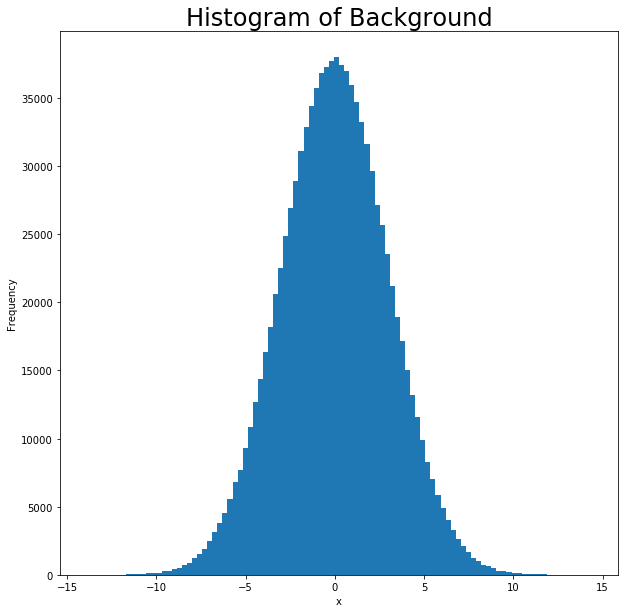

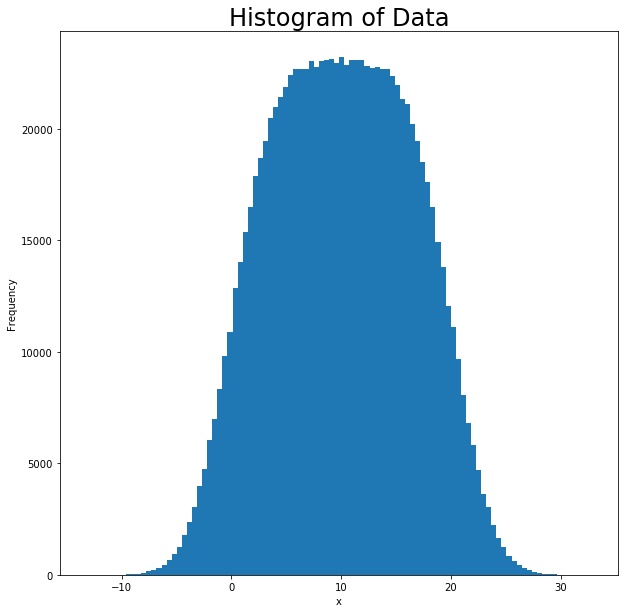

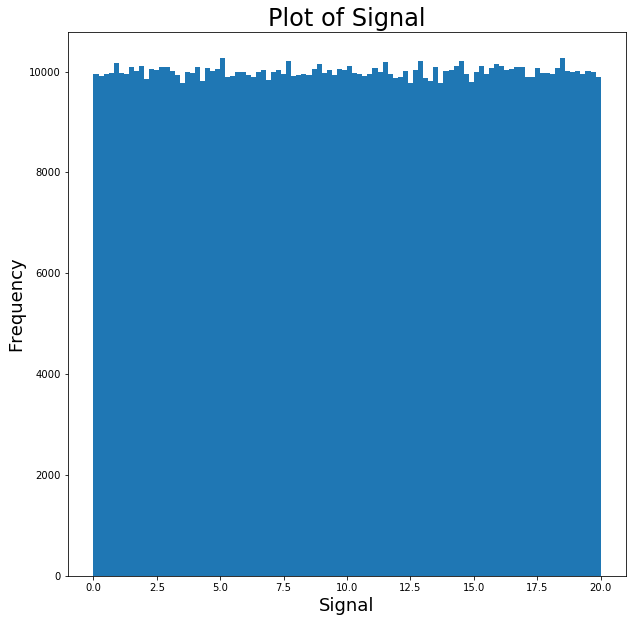

In [3]:
bkgd = stats.norm.rvs(loc=0, scale=3, size=1000000)
rand_signal = np.random.uniform(low=0.0, high=20, size=(1000000))
data = bkgd+rand_signal

plt.hist(bkgd, bins=100)
plt.title('Histogram of Background', fontsize=24)
plt.ylabel('Frequency')
plt.xlabel('x')
plt.show()

plt.hist(data, bins=100)
plt.title('Histogram of Data', fontsize=24)
plt.ylabel('Frequency')
plt.xlabel('x')
plt.show()

plt.hist(rand_signal, bins=100)
plt.title('Plot of Signal', fontsize=24)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Signal', fontsize=18)
plt.show()

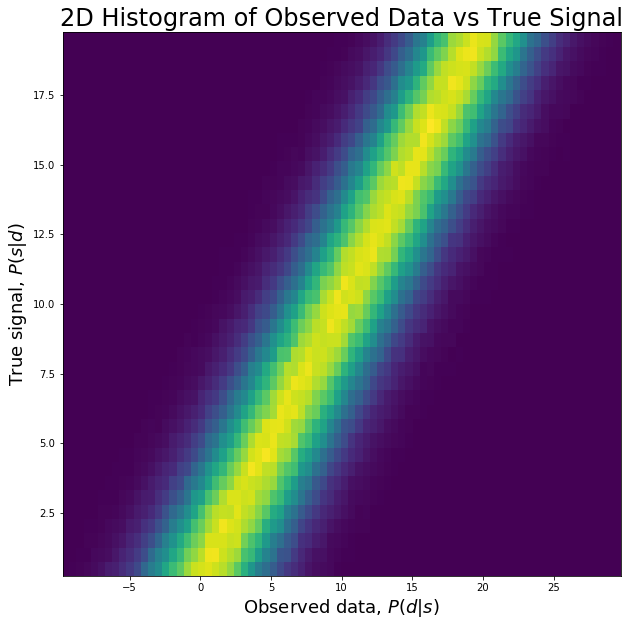

In [4]:
signal_edges = np.linspace(0,20,40)
data_edges = np.linspace(-10,30,80)

Psd, temp, temp2 = np.histogram2d(data, rand_signal, bins=[data_edges, signal_edges], density=True)
data_centers = (data_edges[:-1]+data_edges[1:])/2
signal_centers = (signal_edges[:-1]+signal_edges[1:])/2

plt.pcolormesh(data_centers, signal_centers, Psd.T)
plt.title('2D Histogram of Observed Data vs True Signal', fontsize=24)
plt.ylabel('True signal, $P(s|d)$', fontsize=18);
plt.xlabel('Observed data, $P(d|s)$', fontsize=18);

**Section 1b**

Here, we will select a true injected signal and plot $P(d|s)$ using stair style plot. So, we are plotting a horizontal slice of the 2D histogram which corresponds to True Signal = 10. Specifically, we get a plot of observed signals given a true signal of 10. We see we get a Gaussian distribution which makes sense considering the 2D histogram. 

In [5]:
my_data = pd.DataFrame(Psd)

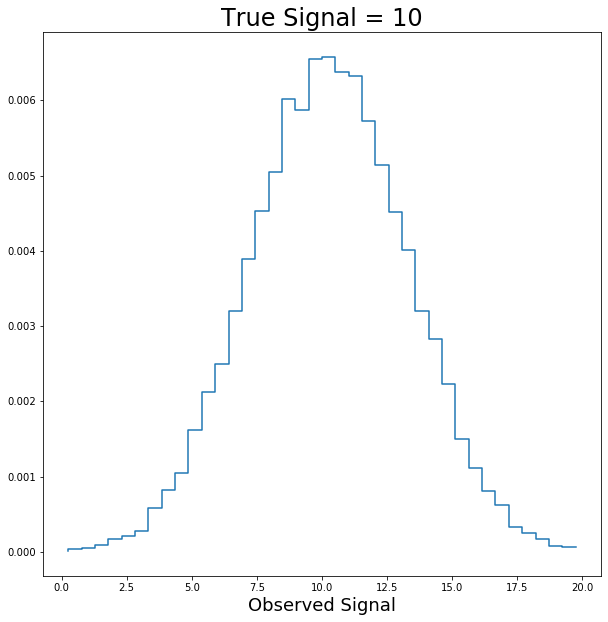

In [6]:
row_slice = my_data.iloc[40,:]
plt.step(signal_centers,row_slice);
plt.title('True Signal = 10', fontsize=24);
plt.xlabel('Observed Signal', fontsize=18);

**Section 1c**

Here, we will select an observed data value and plot $P(s|d)$ using stair style plot. So, we are plotting a vertical slice of the 2D histogram which corresponds to Observed Data = 10. Specifically, we get a plot of true signals given an observed signal of 10. We see we get a Gaussian distribution which makes sense considering the 2D histogram.  

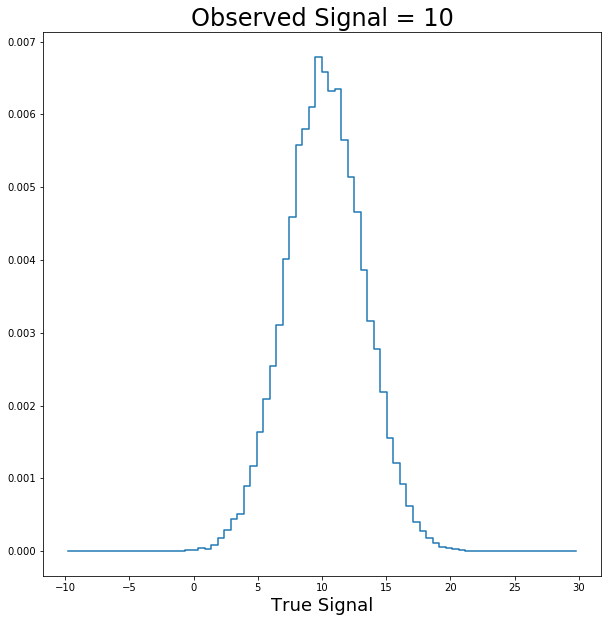

In [7]:
col_slice = my_data.iloc[:,20]
plt.step(data_centers,col_slice);
plt.title('Observed Signal = 10', fontsize=24);
plt.xlabel('True Signal', fontsize=18);

### **Problem 2**

Here, we will repeat what was done above but with a background with non-zero mean. The easiest way would be to use a Gaussian distribution with non-zero mean which is shifted by at least a couple of $\sigma$. We will choose a Gaussian distribution with a mean of 5. 

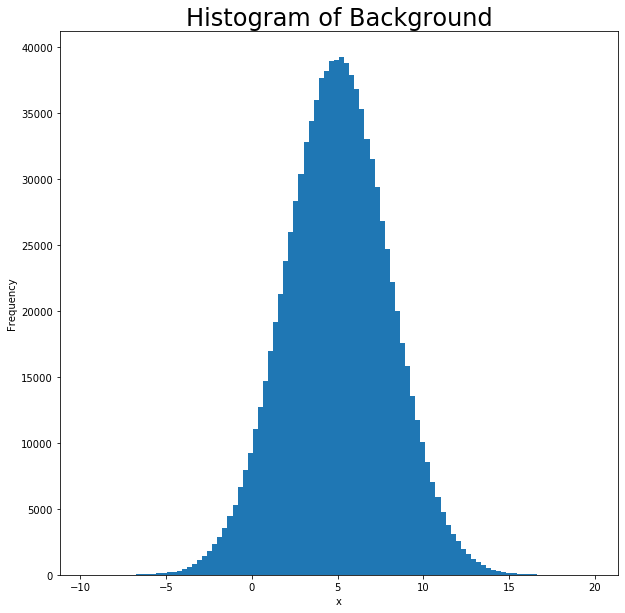

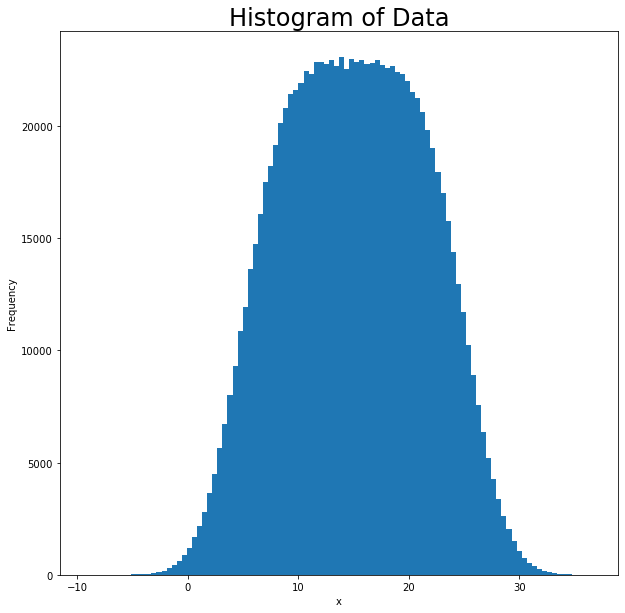

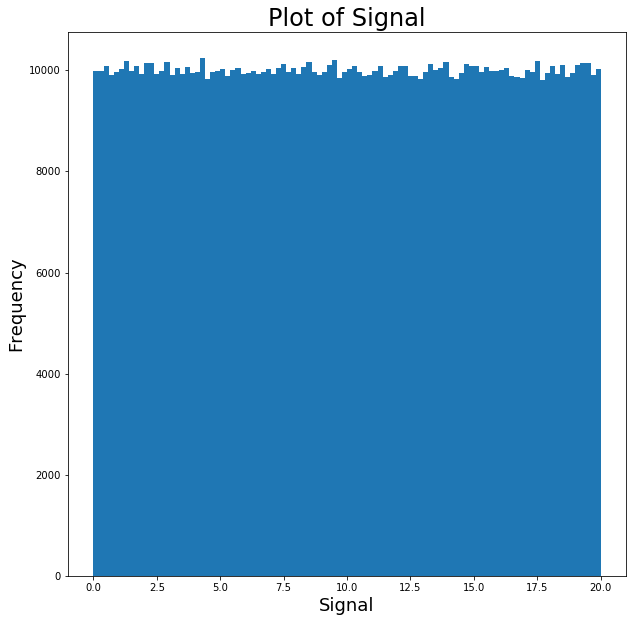

In [8]:
bkgd2 = stats.norm.rvs(loc=5, scale=3, size=1000000)
rand_signal2 = np.random.uniform(low=0.0, high=20, size=(1000000))
data2 = bkgd2+rand_signal2

plt.hist(bkgd2, bins=100)
plt.title('Histogram of Background', fontsize=24)
plt.ylabel('Frequency')
plt.xlabel('x')
plt.show()

plt.hist(data2, bins=100)
plt.title('Histogram of Data', fontsize=24)
plt.ylabel('Frequency')
plt.xlabel('x')
plt.show()

plt.hist(rand_signal2, bins=100)
plt.title('Plot of Signal', fontsize=24)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Signal', fontsize=18)
plt.show()

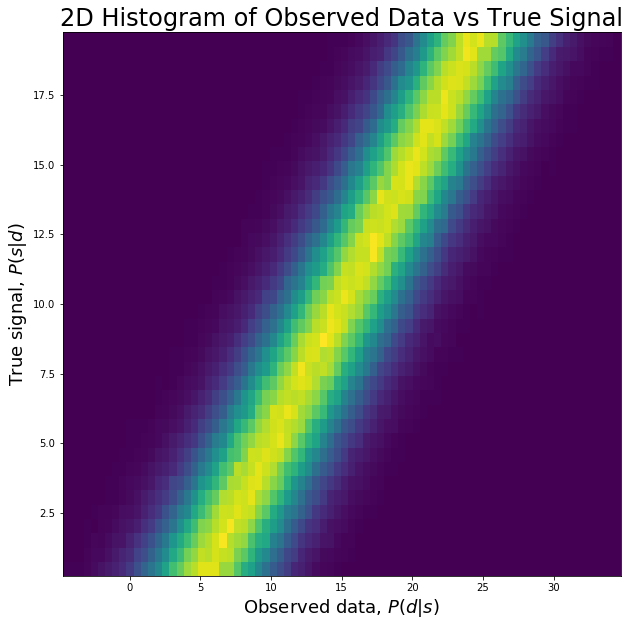

In [9]:
signal_edges = np.linspace(0,20,40)
data_edges = np.linspace(-5,35,80)

Psd, temp, temp2 = np.histogram2d(data2, rand_signal2, bins=[data_edges, signal_edges], density=True)
data_centers2 = (data_edges[:-1]+data_edges[1:])/2
signal_centers2 = (signal_edges[:-1]+signal_edges[1:])/2

plt.pcolormesh(data_centers2, signal_centers2, Psd.T)
plt.title('2D Histogram of Observed Data vs True Signal', fontsize=24)
plt.ylabel('True signal, $P(s|d)$', fontsize=18);
plt.xlabel('Observed data, $P(d|s)$', fontsize=18);

In [10]:
my_data2 = pd.DataFrame(Psd)

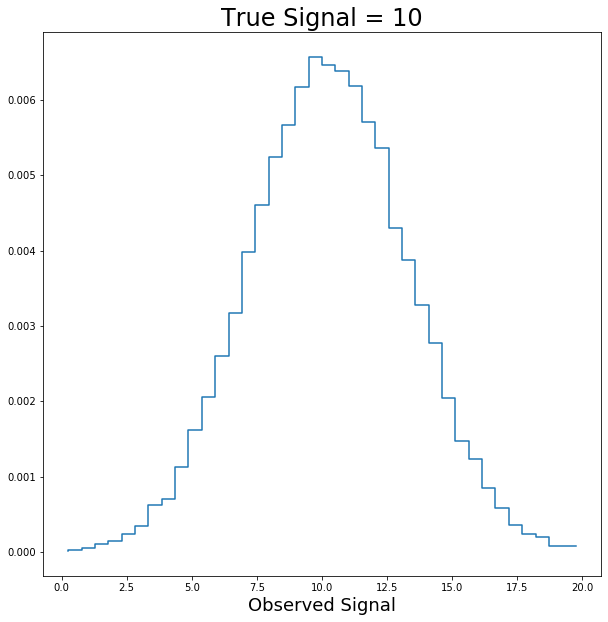

In [11]:
row_slice = my_data2.iloc[40,:]
plt.step(signal_centers2,row_slice);
plt.title('True Signal = 10', fontsize=24);
plt.xlabel('Observed Signal', fontsize=18);

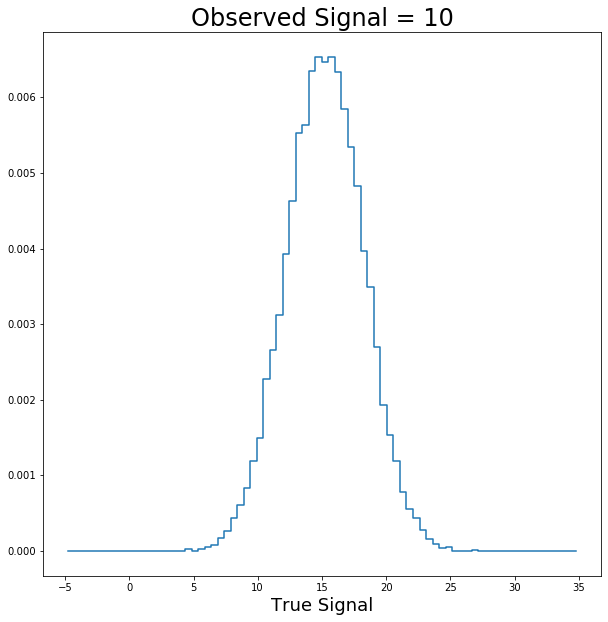

In [12]:
col_slice = my_data2.iloc[:,20]
plt.step(data_centers2,col_slice);
plt.title('Observed Signal = 10', fontsize=24);
plt.xlabel('True Signal', fontsize=18);

From the graphs below, we see how $P(d|s)$ and $P(s|d)$ are not centered  on the same value. The reason for this is because the 2D histogram is shifted horizontally by the non-zero mean of the new background distribution. Specifically, the 2D histogram and the background were shifted horizontally by 5. However, the true signal was not shifted vertically which explains why $P(d|s)$ and $P(s|d)$ are not centered. So, we have $P(d|s)$ shifted by 5 while $P(s|d)$ is not shifted. Thus, the observed signal is biased. 

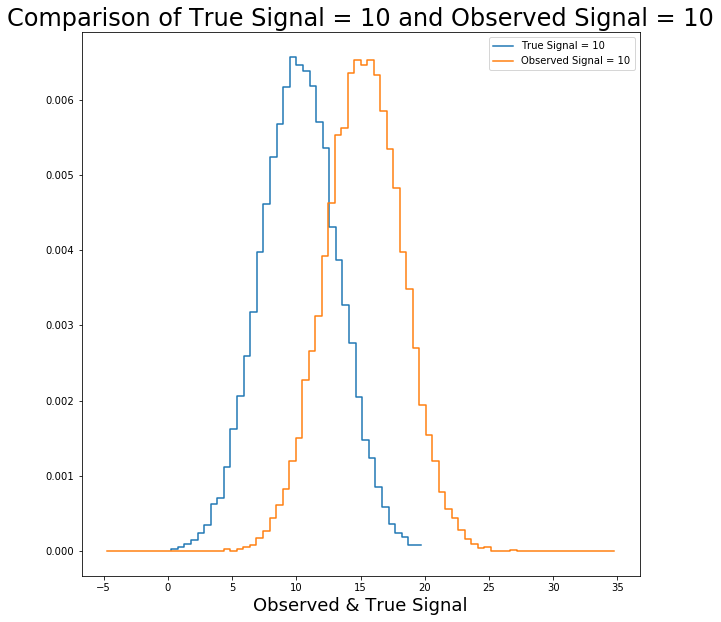

In [13]:
plt.step(signal_centers2,row_slice, label='True Signal = 10');
plt.step(data_centers2,col_slice, label='Observed Signal = 10');
plt.legend()
plt.title('Comparison of True Signal = 10 and Observed Signal = 10', fontsize=24)
plt.xlabel('Observed & True Signal', fontsize=18)
plt.show()